<a href="https://colab.research.google.com/github/js4410/Glassdoor-job-salary-predictor/blob/main/EDA_s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import urllib.parse

In [10]:
df = pd.read_csv("/content/salary_data_cleaned.csv")
skills = pd.read_csv("/content/salary_data_cleaned.csv")

In [ ]:
titles = df['Job Title'].unique()
titles

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

In [ ]:
def get_seniority(job_title): #categorizes the job listings into seniority level.

    if 'sr' in job_title.lower() or 'sr.' in job_title.lower() or 'senior' in job_title.lower() or 'manager' in job_title.lower():
            return 'senior'
    elif 'jr.' in job_title.lower() or 'junior' in job_title.lower() or 'associate' in job_title.lower():
        return 'junior'
    else:
        return 'mid-level'

In [ ]:
df['Seniority'] = df['Job Title'].apply(get_seniority)
df['Seniority']

0      mid-level
1      mid-level
2      mid-level
3      mid-level
4      mid-level
         ...    
737       senior
738       senior
739    mid-level
740       senior
741    mid-level
Name: Seniority, Length: 742, dtype: object

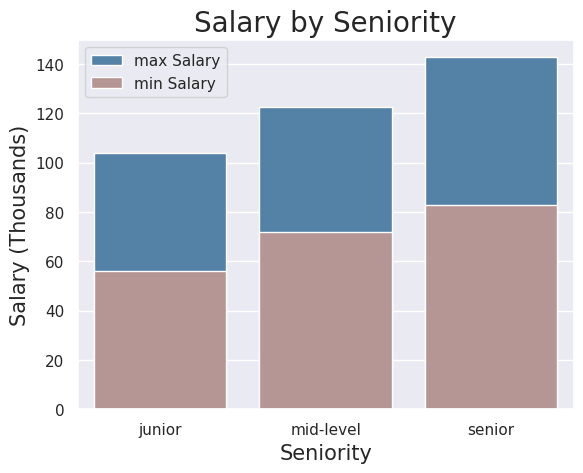

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  # Import for plt functionalities

sns.set_theme()  # Set default theme (optional)

ax = sns.barplot(
    x='Seniority',
    y='max_salary',  # Assuming the column name is 'Max_salary'
    data=df,
    order=['junior', 'mid-level', 'senior'],
    errorbar=None,  # No confidence intervals
    color='steelblue',
    label='max Salary'  # Add label for legend
)

# Create a second barplot on the same axes for Min Salary (assuming 'Min_salary' exists)
ax = sns.barplot(
    x='Seniority',
    y='min_salary',
    data=df,
    order=['junior', 'mid-level', 'senior'],
    errorbar=None,
    color='rosybrown',
    label='min Salary'  # Add label for legend
)

# Customize plot elements
plt.title('Salary by Seniority', fontsize=20)
plt.xlabel('Seniority', fontsize=15)
plt.ylabel('Salary (Thousands)', fontsize=15)

# Add legend
plt.legend()

plt.show()


<ipython-input-12-212ad0b5adaf>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = 'Industry', y = 'avg_salary', data = df, order = plot_order, ci = None)


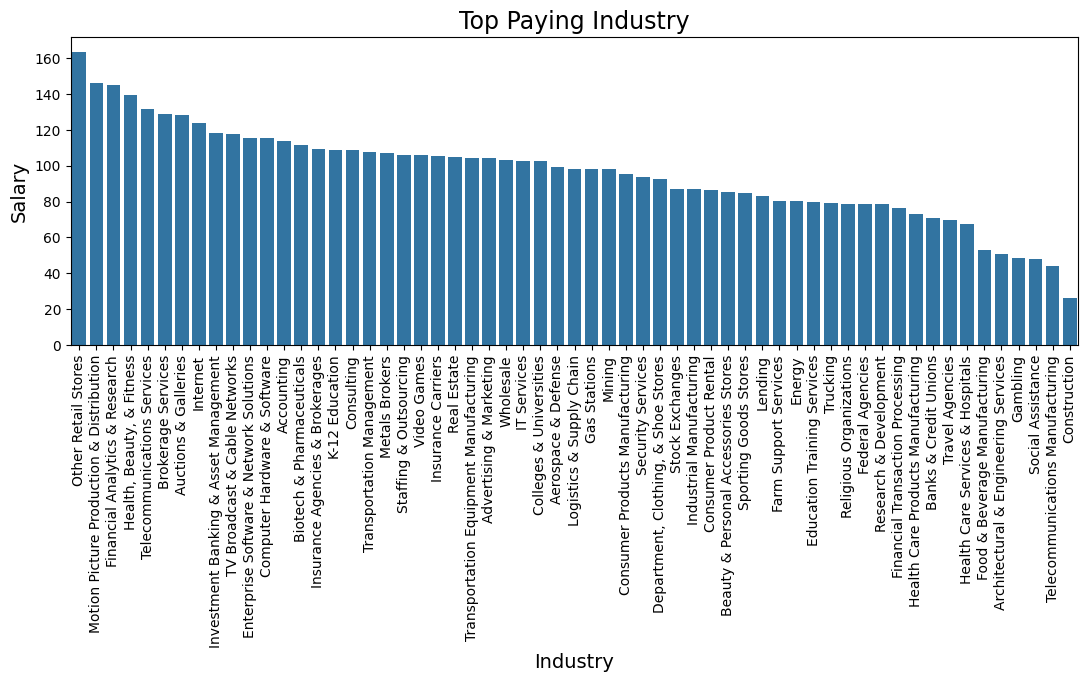

In [12]:
df = df[df['Industry'] != '-1']
fig = plt.figure(figsize = (13, 4))

plot_order = df.groupby(['Industry'])['avg_salary'].mean().sort_values(ascending = False).index.values
ax = sns.barplot(x = 'Industry', y = 'avg_salary', data = df, order = plot_order, ci = None)

plt.xticks(rotation=90)
plt.title("Top Paying Industry", fontsize = 17)
plt.xlabel('Industry', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)

plt.show()
#Though Retail stores is at the forefront as a top paying industry, once again, there is only 1 company which is in that industry

In [13]:
df['Industry'].value_counts()

Industry
Biotech & Pharmaceuticals                   112
Insurance Carriers                           63
Computer Hardware & Software                 59
IT Services                                  50
Health Care Services & Hospitals             49
Enterprise Software & Network Solutions      42
Internet                                     29
Consulting                                   29
Aerospace & Defense                          25
Advertising & Marketing                      25
Consumer Products Manufacturing              20
Research & Development                       19
Colleges & Universities                      16
Energy                                       14
Banks & Credit Unions                        12
Federal Agencies                             11
Staffing & Outsourcing                       10
Travel Agencies                               8
Lending                                       8
Food & Beverage Manufacturing                 8
Financial Analytics & Research 

<ipython-input-14-76d495394af1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x = 'Company Name', y = 'avg_salary', data = df, order = plot_order, ci = None)


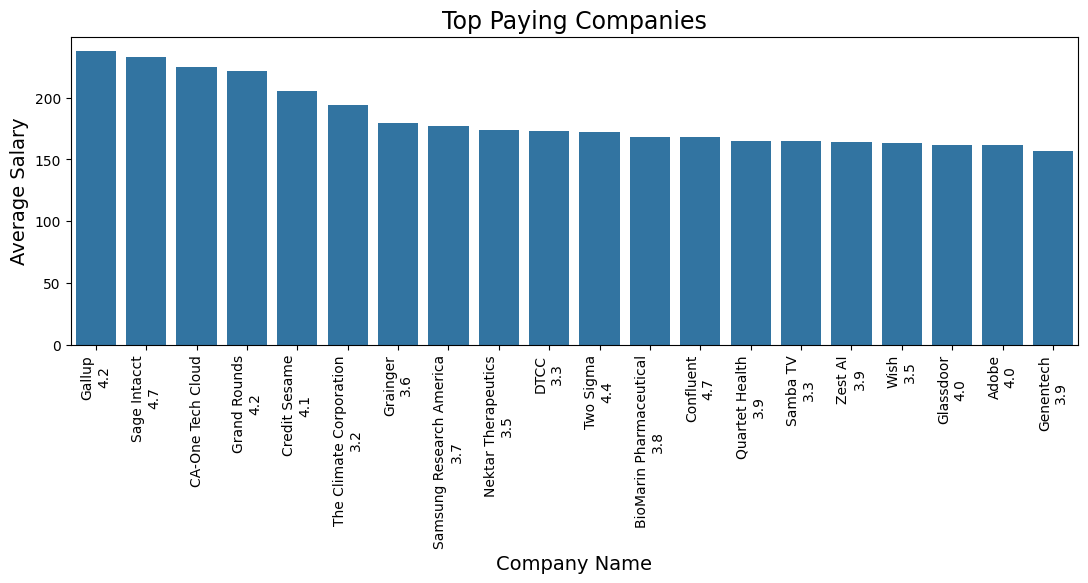

In [14]:
fig = plt.figure(figsize = (13, 4))

plot_order = df.groupby(['Company Name'])['avg_salary'].mean().sort_values(ascending = False).index.values[:20]
ax = sns.barplot(x = 'Company Name', y = 'avg_salary', data = df, order = plot_order, ci = None)

plt.xticks(rotation=90)
plt.title("Top Paying Companies", fontsize = 17)
plt.xlabel('Company Name', fontsize = 14)
plt.ylabel('Average Salary', fontsize = 14)

plt.show()

Mean value for Min Salary: 73.75
Mean value for Max Salary: 127.1188524590164


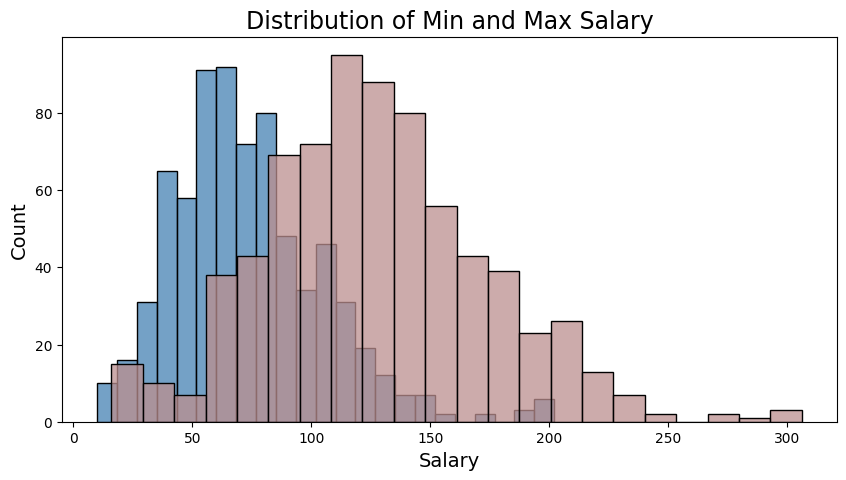

In [15]:
print("Mean value for Min Salary:", df['min_salary'].mean())
print("Mean value for Max Salary:", df['max_salary'].mean())

fig = plt.figure(figsize = (10,5))

sns.histplot(data = df, x = 'min_salary', color = 'steelblue')
sns.histplot(data = df, x = 'max_salary', color = 'rosybrown')

plt.title("Distribution of Min and Max Salary", fontsize = 17)
plt.xlabel('Salary', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show()

Mean value for Avg Salary: 100.62601078167116


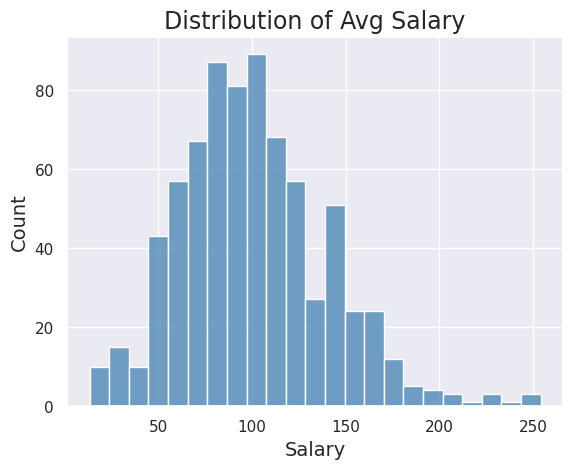

In [ ]:
print("Mean value for Avg Salary:", df['avg_salary'].mean())

sns.histplot(data = df, x = 'avg_salary', color = 'steelblue')

plt.title("Distribution of Avg Salary", fontsize = 17)
plt.xlabel('Salary', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show()

<ipython-input-56-10aafa39e0a1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Location', y='max_salary', data = df, order = plot_order, ci = None, color = 'steelblue')
<ipython-input-56-10aafa39e0a1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Location', y='max_salary', data = df, order = plot_order, ci = None, color = 'rosybrown')


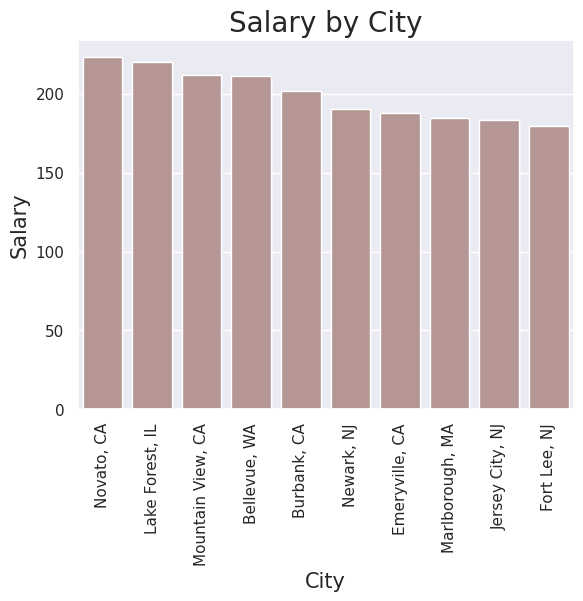

In [ ]:
plot_order=df.groupby("Location")['max_salary'].mean().sort_values(ascending=False)[:10].index.values

ax = sns.barplot(x='Location', y='max_salary', data = df, order = plot_order, ci = None, color = 'steelblue')
ax = sns.barplot(x='Location', y='max_salary', data = df, order = plot_order, ci = None, color = 'rosybrown')

plt.xticks(rotation=90)
plt.title('Salary by City', fontsize = 20)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)

plt.show()

<ipython-input-58-310d44de71a3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y = 'Location', data = df, order = df.Location.value_counts().iloc[:10].index, palette = 'husl')


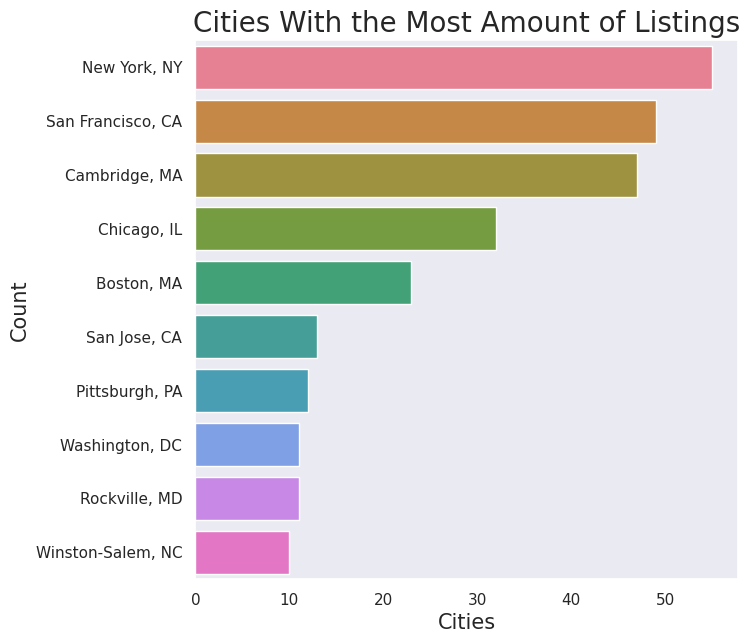

In [ ]:
plt.figure(figsize=(7,7))
sns.set_style("dark")

# Graphing the plot
ax = sns.countplot(y = 'Location', data = df, order = df.Location.value_counts().iloc[:10].index, palette = 'husl')
plt.title('Cities With the Most Amount of Listings', fontsize = 20)
plt.xlabel('Cities', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [ ]:
df['Rating'].unique()

array([ 3.8,  3.4,  4.8,  2.9,  4.1,  3.3,  4.6,  3.5,  3.2,  3.7,  3.6,
        3.9,  4.3,  4.2,  4. ,  4.7,  5. ,  3.1,  4.4,  2.8,  2.7,  1.9,
        4.5,  3. ,  2.3,  2.6, -1. ,  2.4,  2.5,  2.2,  2.1])

Mean value for Rating: 3.6188679245283017


<ipython-input-64-837f979325da>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x = 'Rating', palette = 'steelblue')


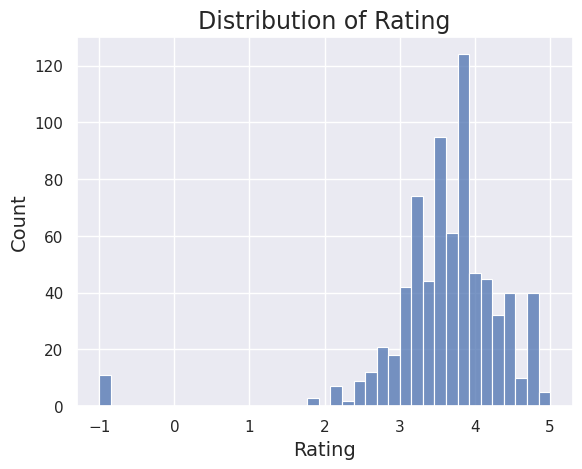

In [ ]:
print("Mean value for Rating:", df['Rating'].mean())

sns.histplot(data = df, x = 'Rating', palette = 'steelblue')
plt.title("Distribution of Rating", fontsize = 17)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show()

In [ ]:
df['Size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)

In [ ]:
df['Size'].replace(np.nan, 'Unknown', inplace = True)

<ipython-input-20-ee3a095c41d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y = 'Size', data = df, order = df.Size.value_counts().index, palette = 'husl')


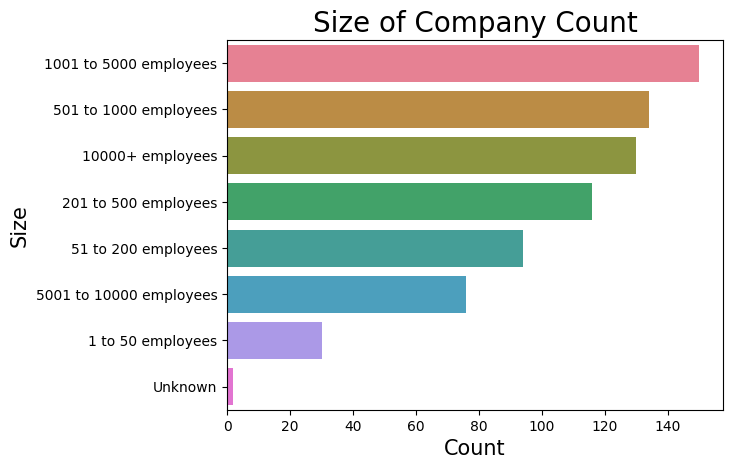

In [20]:
df = df[df['Size'] != 'unknown']
ax = sns.countplot(y = 'Size', data = df, order = df.Size.value_counts().index, palette = 'husl')
plt.title('Size of Company Count', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Size', fontsize = 15)

plt.show()

In [ ]:
df['Industry'].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Telecommunications Services', 'IT Services',
       'Computer Hardware & Software', '-1',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Metals Brokers', 'Financial Transaction Processing',
       'Sporting Goods Stores', 'Staffing & Outsourcing', 'Wholesale',
       'Mining', 'Financial Analytics & Research', 'Federal Agencies',
       'Education Training Services',
       'Transportation Equipment Manufacturing', 'Farm Support 

<ipython-input-26-e7c52dc7d904>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y = 'Industry', data = df, order = df.Industry.value_counts().index, palette = 'husl')


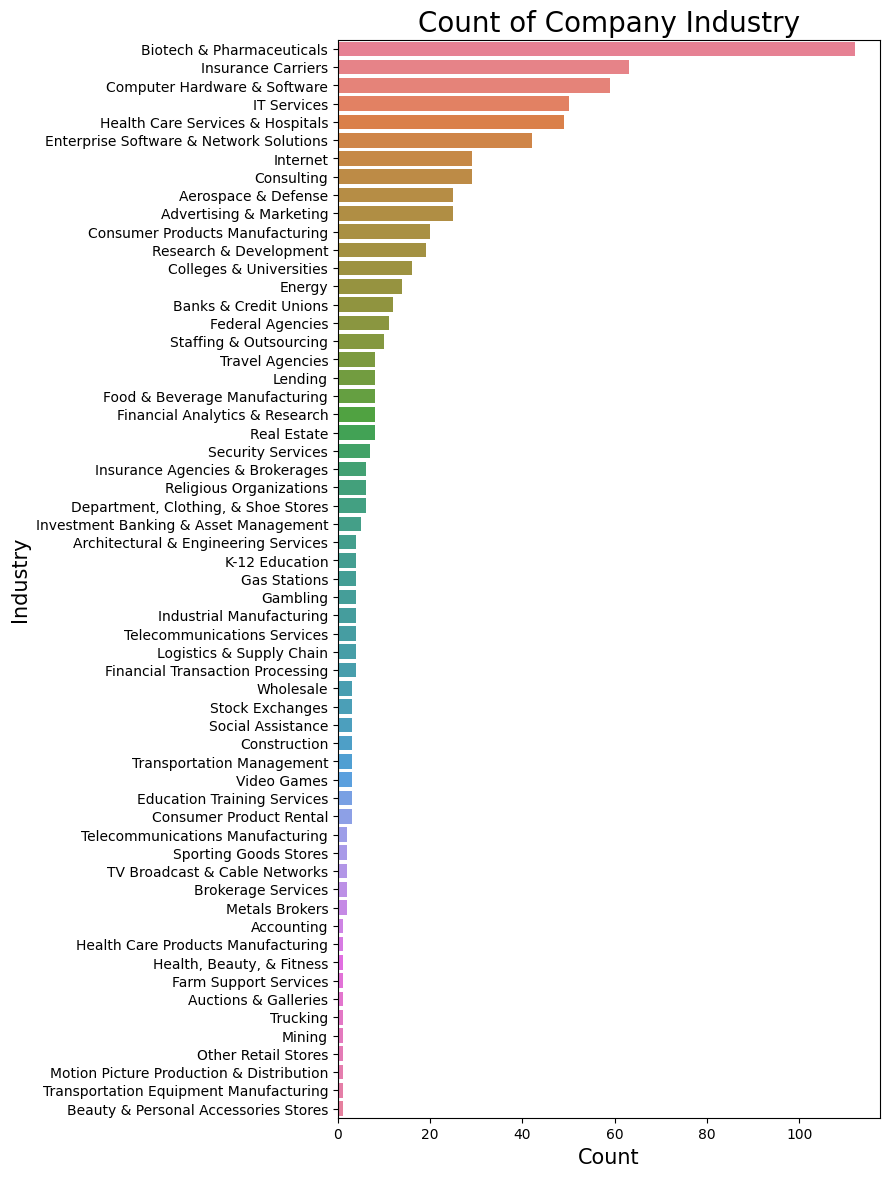

In [26]:
plt.figure(figsize=(7,14))

ax = sns.countplot(y = 'Industry', data = df, order = df.Industry.value_counts().index, palette = 'husl')
plt.title('Count of Company Industry', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Industry', fontsize = 15)

plt.show()

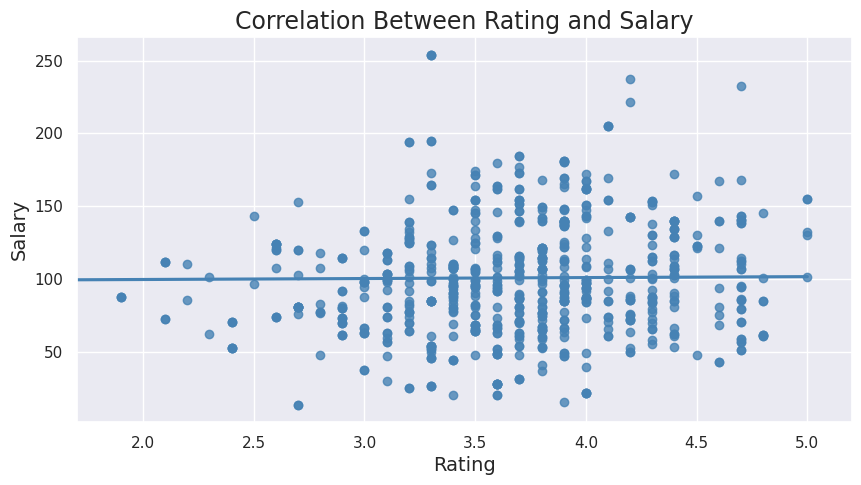

In [ ]:
fig = plt.figure(figsize = (10, 5))

ax = sns.regplot(x = 'Rating', y = 'avg_salary', data = df, ci = None, color = 'steelblue')
ax.set_xlim(1.7, 5.2)
plt.title("Correlation Between Rating and Salary", fontsize = 17)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)

plt.show()
#Turns out there is little to no correlation between salary and company rating.